In [2]:
import sys#only needed to determine python version number
import os #required to set current working directory
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#While displaying data ,ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\TCSInternshipsubmitfolder'

In [5]:
df=pd.read_csv('C:\\Users\\HP\\Desktop\\tcsioninternship\\HRDataset_v14.csv')

<AxesSubplot:xlabel='count', ylabel='RecruitmentSource'>

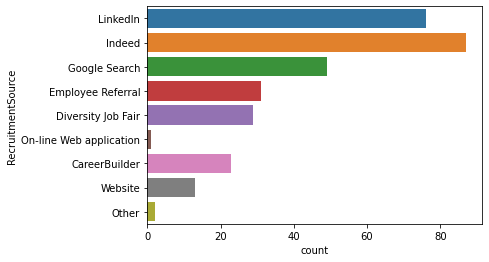

In [7]:
#Recruitment countplot
sns.countplot(y="RecruitmentSource", data=df)

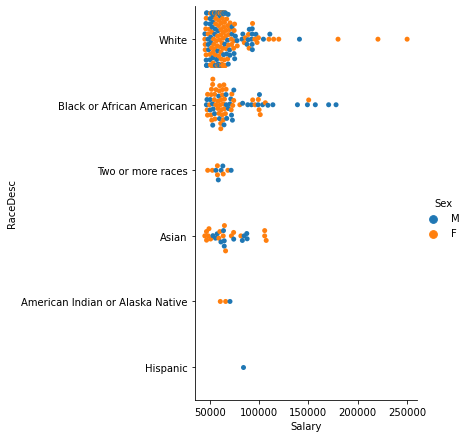

In [9]:
#Salary
#Salary compared to race
sns.catplot(height=6, y="RaceDesc", x="Salary", hue="Sex",kind='swarm', data=df)

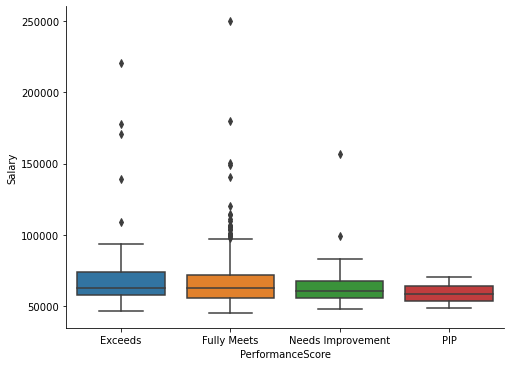

In [11]:
#Box plot performance to salary with aspect w/h
sns.catplot(aspect=7/5,x="PerformanceScore", y="Salary", kind='box',data=df)

Salary & Engagement = 0.06496607104732481


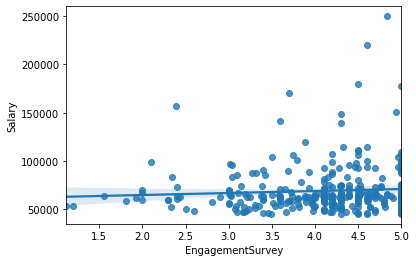

In [14]:
#Corr
sns.regplot(y="Salary", x="EngagementSurvey", data=df)
print("Salary & Engagement = "+ str(df['Salary'].corr(df['EngagementSurvey'])))

Performance Score & Position = 0.005226508043668292


<AxesSubplot:xlabel='PerformanceScore', ylabel='Absences'>

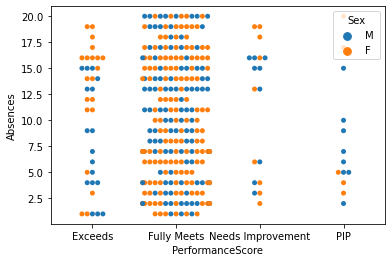

In [15]:
#Extra
print("Performance Score & Position = "+ str(df['PerfScoreID'].corr(df['PositionID'])))
#Termination
sns.swarmplot(data=df, x="PerformanceScore", y="Absences", hue="Sex")

In [16]:

df['MarriedID'].value_counts()

df['MaritalStatusID'].value_counts()
df['MaritalDesc'].value_counts()


Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

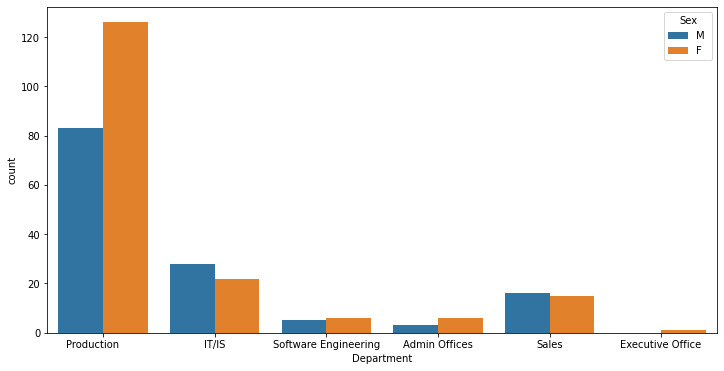

In [17]:
# Now check Gender diversity across departmets

plt.figure(figsize=(12,6))
ax=sns.countplot(x=df['Department'],hue=df['Sex'])

<AxesSubplot:ylabel='RaceDesc'>

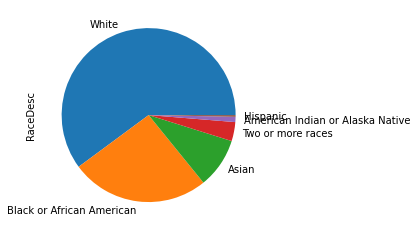

In [18]:
# Now check data by race

df['RaceDesc'].value_counts().plot(kind='pie')
#Most employees are White, then Black/African American, then Asian and then others

<AxesSubplot:>

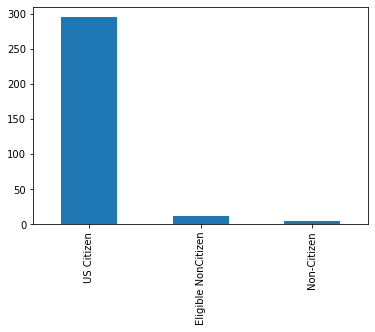

In [19]:
# Now check by Citizen Description
df['CitizenDesc'].value_counts().plot(kind='bar')

<AxesSubplot:>

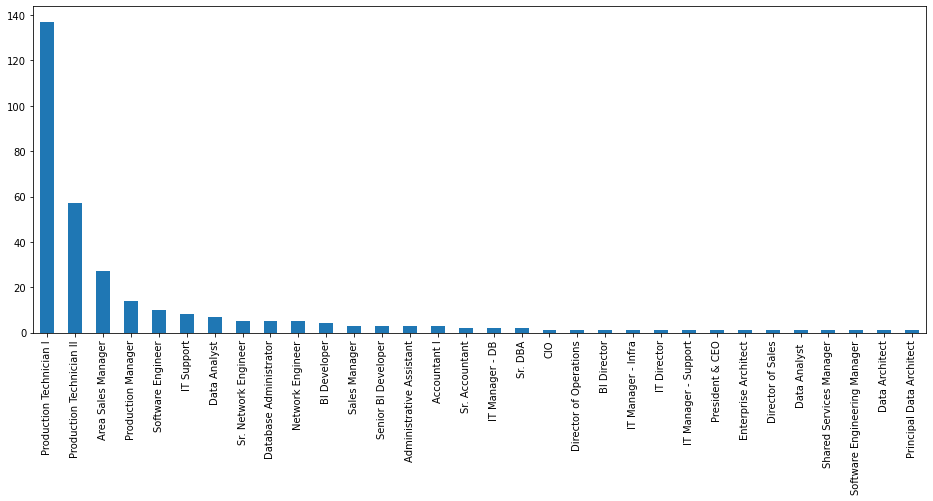

In [22]:
plt.figure(figsize=(16,6))
df['Position'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Department'>

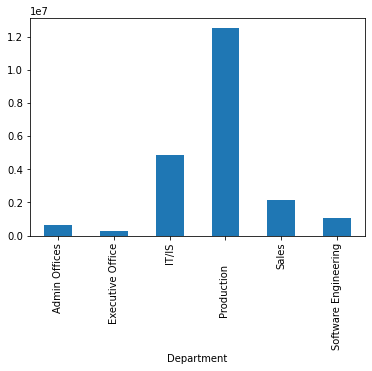

In [23]:
# Find better paying departments

df.groupby('Department')['Salary'].sum().plot(kind='bar')

<AxesSubplot:xlabel='Position'>

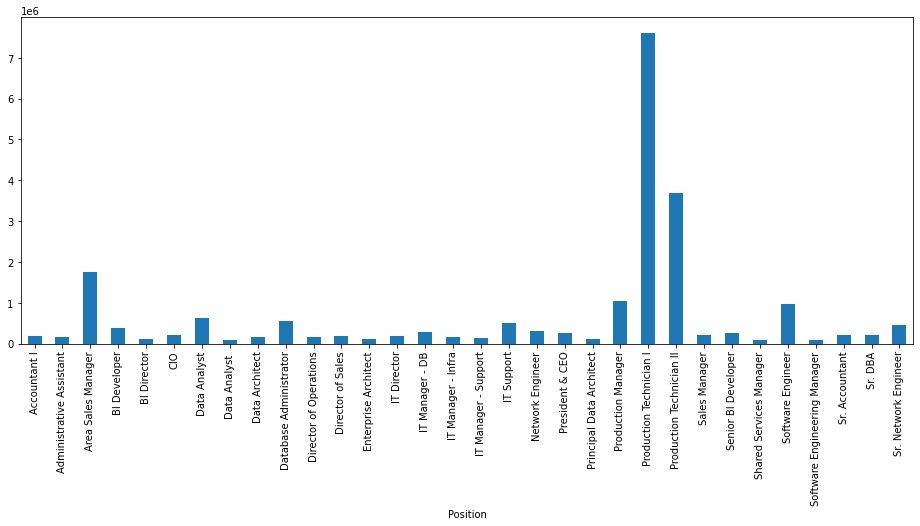

In [24]:
# Find position and salary
plt.figure(figsize=(16,6))
df.groupby('Position')['Salary'].sum().plot(kind='bar')
#production department tops again

<AxesSubplot:>

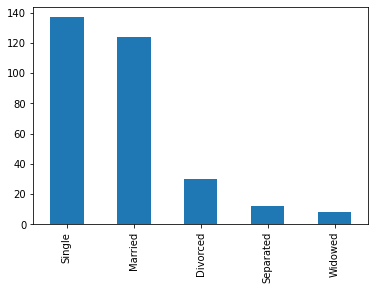

In [25]:
# Employee stats by marital status
df['MaritalDesc'].value_counts().plot(kind='bar')

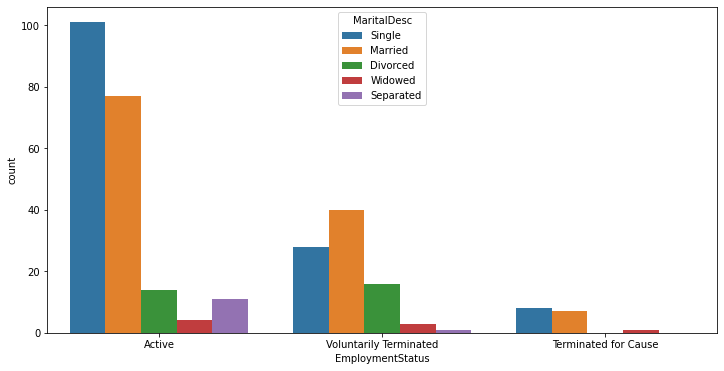

In [26]:
# Employee status against marital status

plt.figure(figsize=(12,6))
ax=sns.countplot(x=df['EmploymentStatus'],hue=df['MaritalDesc'])
#Seems there is voluntary termination during marriage/divorce

<AxesSubplot:xlabel='CitizenDesc', ylabel='Salary'>

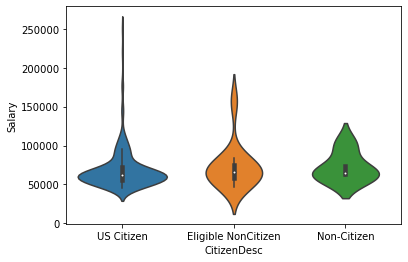

In [28]:
# Few more checking.
# CitizenDesc Vs Salary
sns.violinplot('CitizenDesc', 'Salary', data = df)

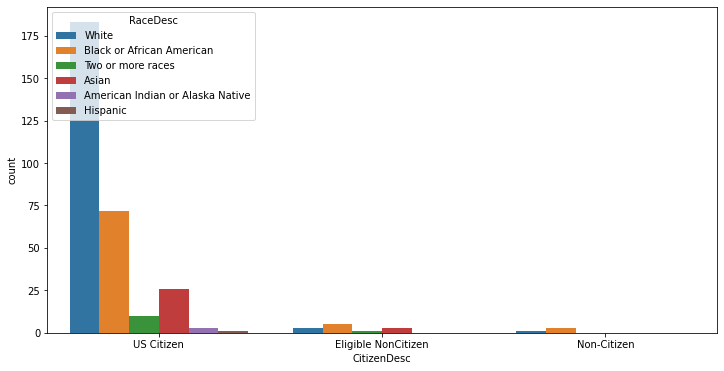

In [29]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=df['CitizenDesc'],hue=df['RaceDesc'])

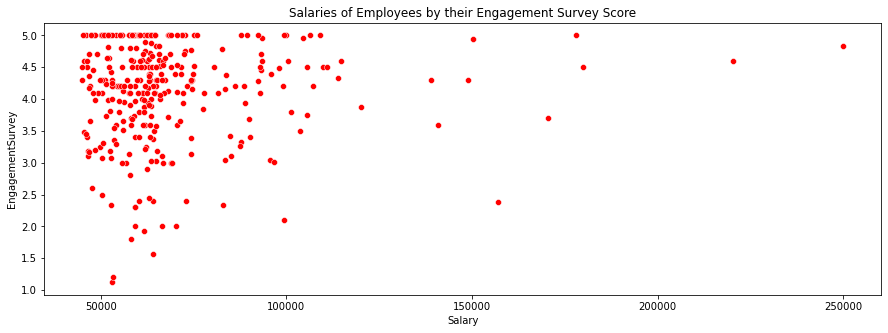

In [32]:
plt.figure(figsize=(15,5))

sns.scatterplot(x=df['Salary'],y=df['EngagementSurvey'],color="r")

plt.title("Salaries of Employees by their Engagement Survey Score")
plt.show()

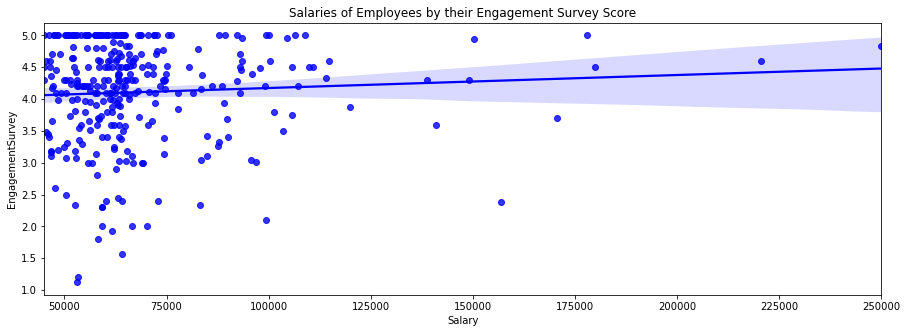

In [33]:
plt.figure(figsize=(15,5))

sns.regplot(x=df['Salary'],y=df['EngagementSurvey'],color="b")

plt.title("Salaries of Employees by their Engagement Survey Score")
plt.show()

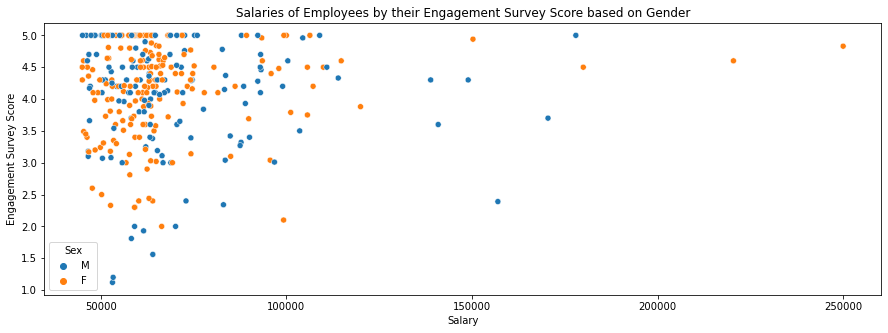

In [34]:
plt.figure(figsize=(15,5))

sns.scatterplot(x=df['Salary'],y=df['EngagementSurvey'],hue=df['Sex'])

plt.xlabel("Salary")
plt.ylabel("Engagement Survey Score")

plt.title("Salaries of Employees by their Engagement Survey Score based on Gender")
plt.show()

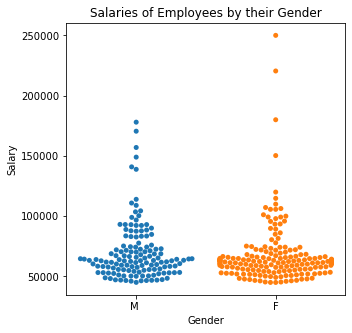

In [35]:
plt.figure(figsize=(5,5))

sns.swarmplot(x="Sex",y="Salary",data=df)

plt.xlabel("Gender")
plt.ylabel("Salary")

plt.title("Salaries of Employees by their Gender")
plt.show()

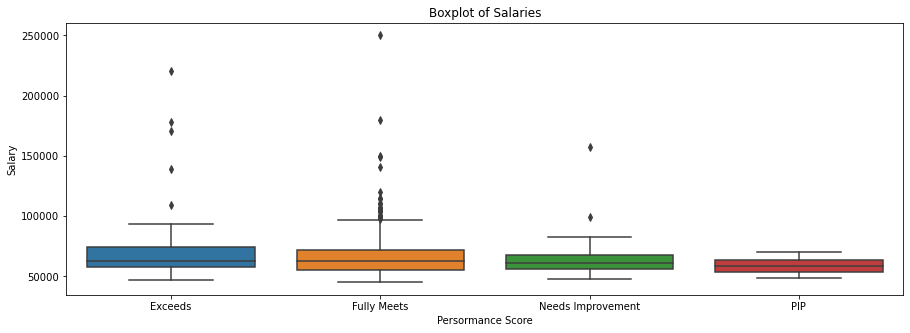

In [37]:
plt.figure(figsize=(15,5))

sns.boxplot( x=df["PerformanceScore"], y=df["Salary"] )

plt.title("Boxplot of Salaries")
plt.ylabel("Salary")
plt.xlabel("Persormance Score")

plt.show()

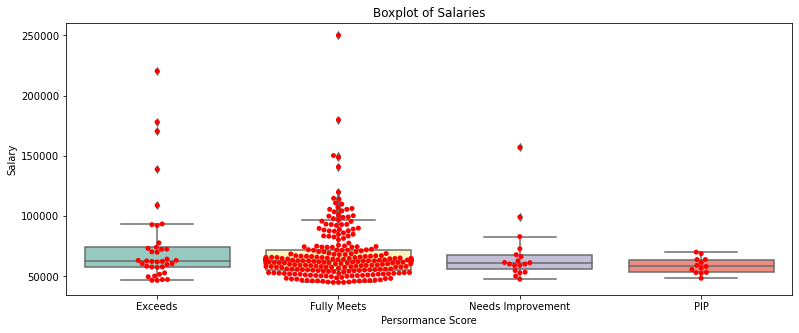

In [40]:
plt.figure(figsize=(13,5))

sns.boxplot(x="PerformanceScore", y="Salary",data=df, palette="Set3")
sns.swarmplot(x="PerformanceScore", y="Salary",data=df,color="r")

plt.title("Boxplot of Salaries")
plt.ylabel("Salary")
plt.xlabel("Persormance Score")

plt.show()

In [41]:
numcol=[]
catcol=[]

for col in df.columns:
    if df[col].dtype=='O':
        catcol.append(col)
    else:
        numcol.append(col)

In [42]:
print("List of categorical columns",catcol)
print("List of numerical columns",numcol)

List of categorical columns ['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date']
List of numerical columns ['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']


In [43]:
print(df[catcol].describe())

       Employee_Name                 Position State       DOB  Sex  \
count            311                      311   311       311  311   
unique           311                       32    28       307    2   
top      Cross, Noah  Production Technician I    MA  09/22/76    F   
freq               1                      137   276         2  176   

       MaritalDesc CitizenDesc HispanicLatino RaceDesc DateofHire  \
count          311         311            311      311        311   
unique           5           3              4        6        101   
top         Single  US Citizen             No    White  1/10/2011   
freq           137         295            282      187         14   

       DateofTermination         TermReason EmploymentStatus  \
count                104                311              311   
unique                96                 18                3   
top            11/4/2015  N/A-StillEmployed           Active   
freq                   2                207    

In [44]:
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


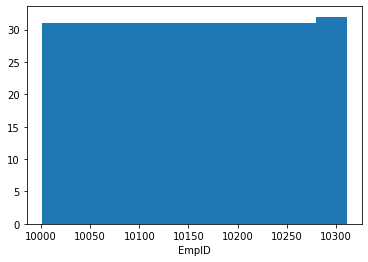

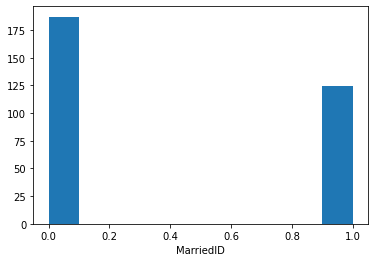

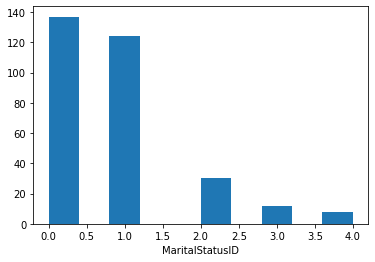

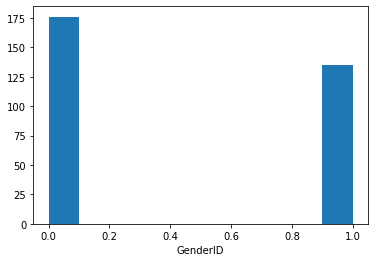

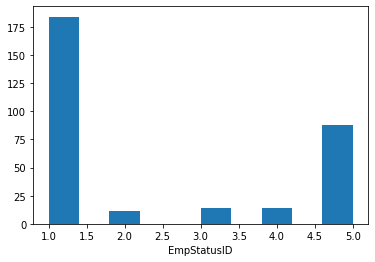

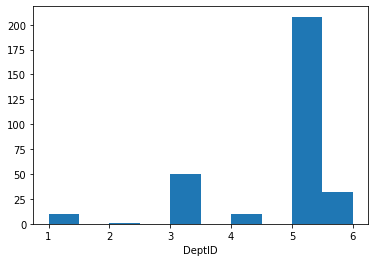

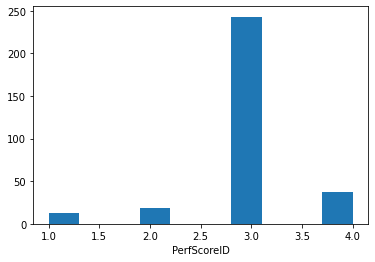

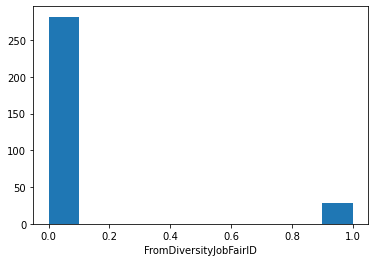

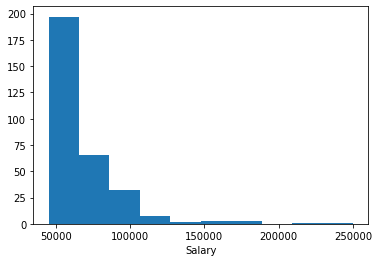

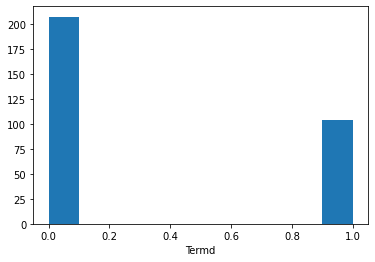

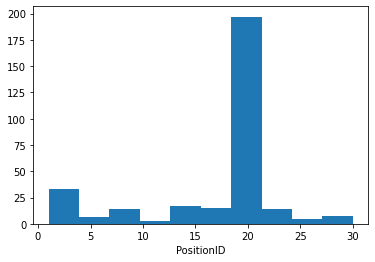

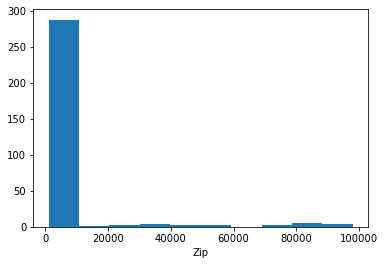

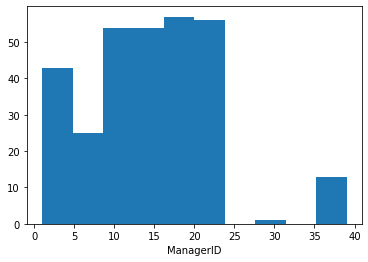

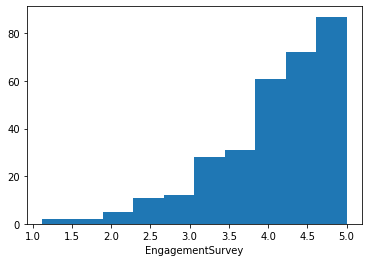

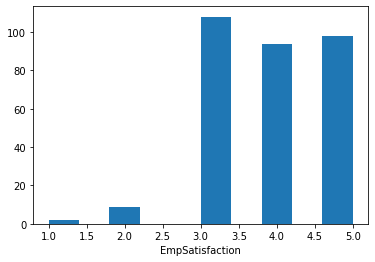

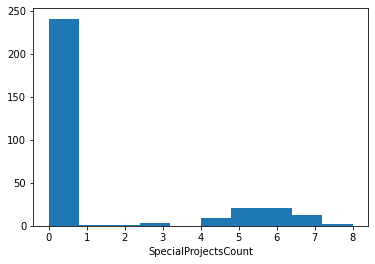

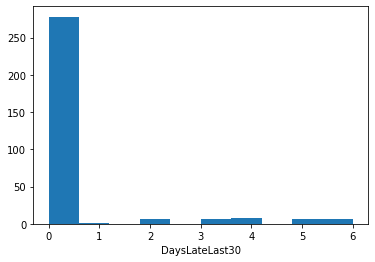

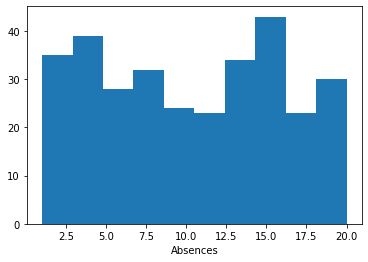

In [45]:
for ncol in numcol:
    plt.hist(df[ncol])
    plt.xlabel(ncol)
    plt.plot()
    plt.show()

EmpID


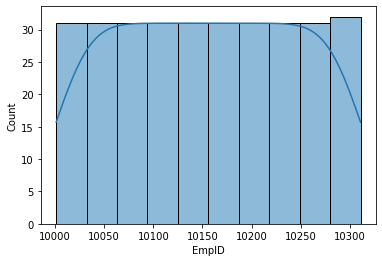

MarriedID


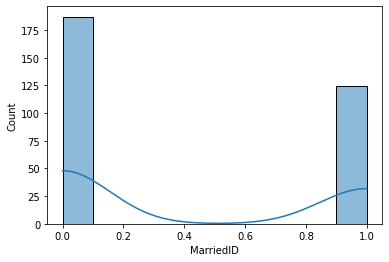

MaritalStatusID


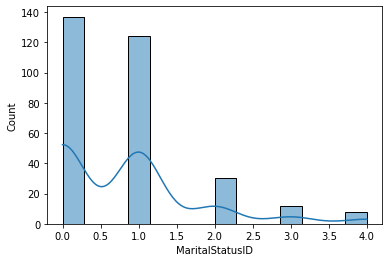

GenderID


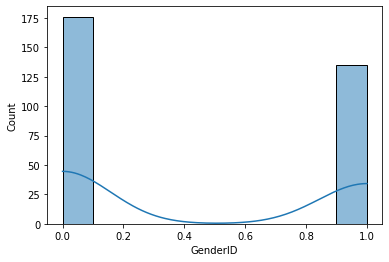

EmpStatusID


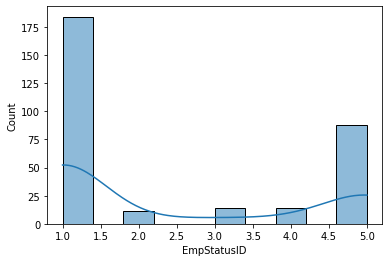

DeptID


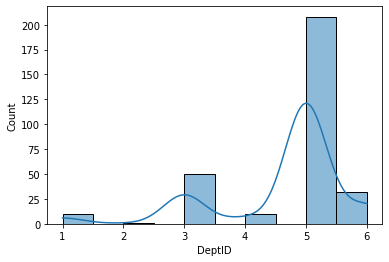

PerfScoreID


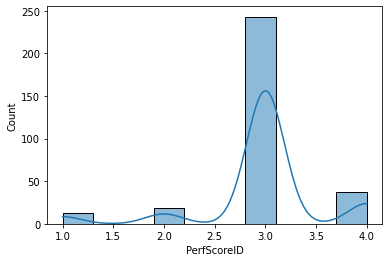

FromDiversityJobFairID


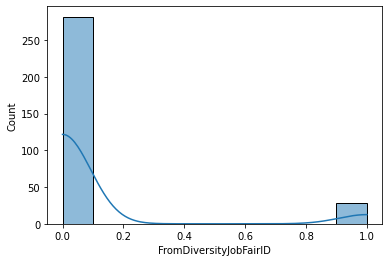

Salary


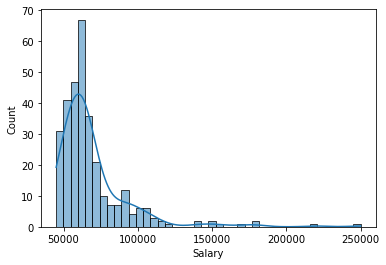

Termd


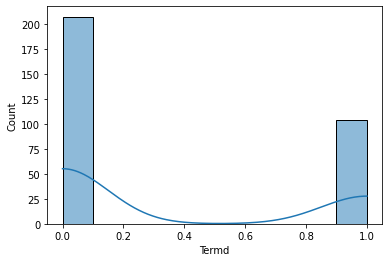

PositionID


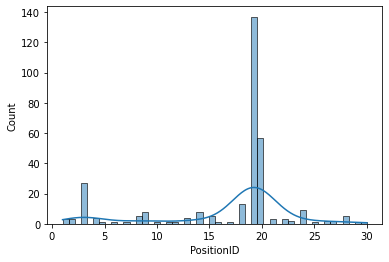

Zip


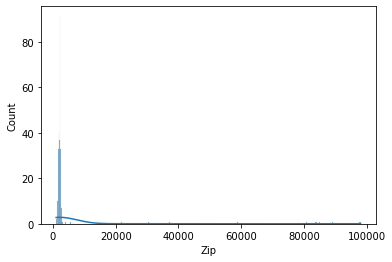

ManagerID


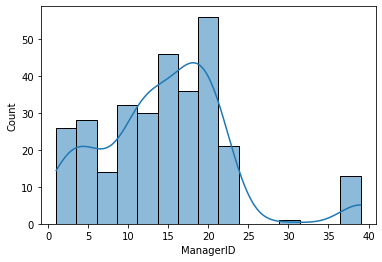

EngagementSurvey


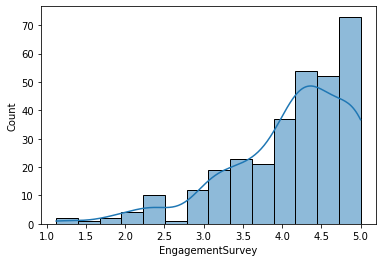

EmpSatisfaction


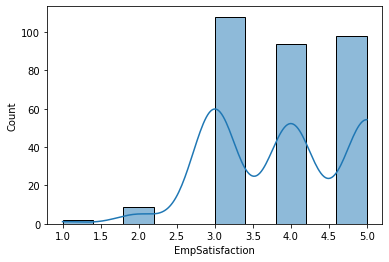

SpecialProjectsCount


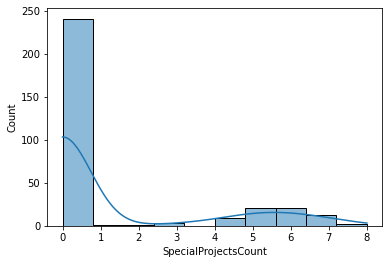

DaysLateLast30


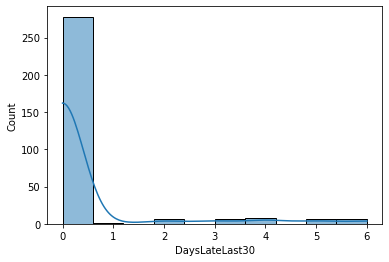

Absences


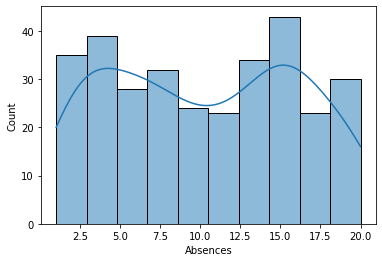

In [46]:
for ncol in numcol:
    print(ncol)
    sns.histplot(df[ncol],kde=True)
    plt.xlabel(ncol)
    plt.plot()
    plt.show()

EmpID


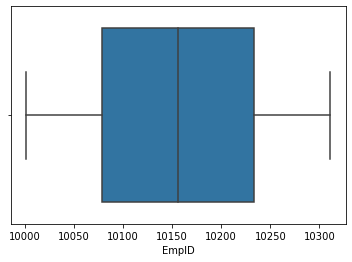

MarriedID


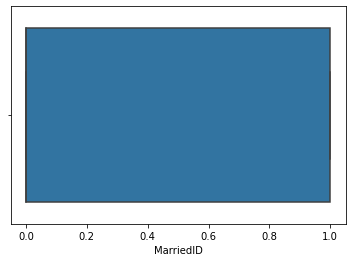

MaritalStatusID


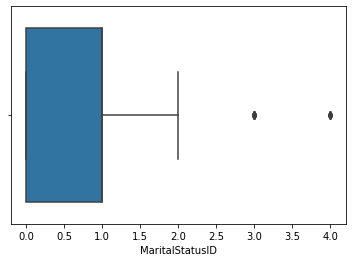

GenderID


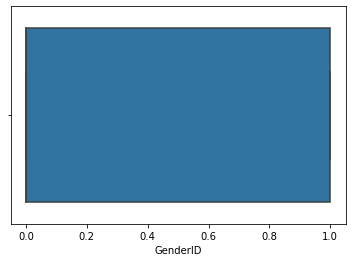

EmpStatusID


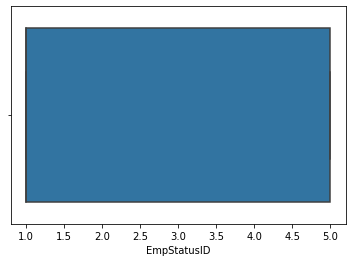

DeptID


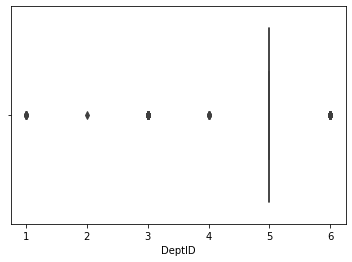

PerfScoreID


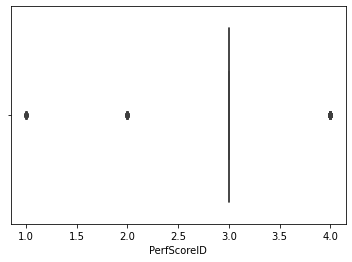

FromDiversityJobFairID


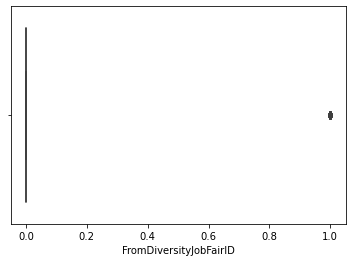

Salary


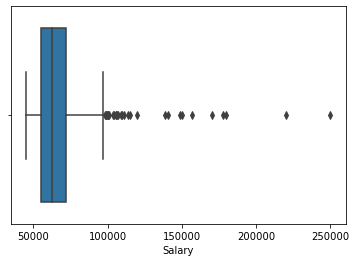

Termd


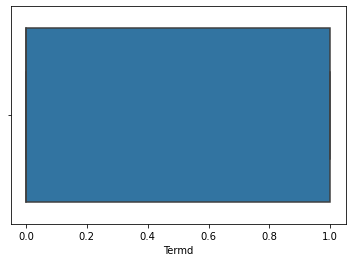

PositionID


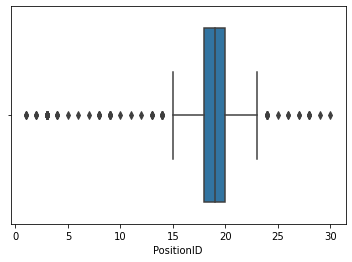

Zip


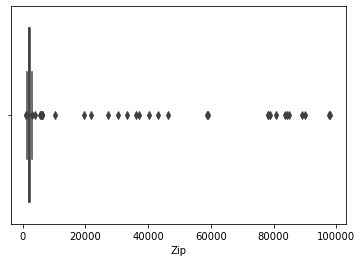

ManagerID


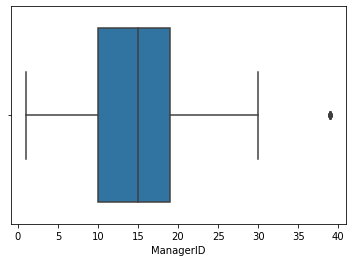

EngagementSurvey


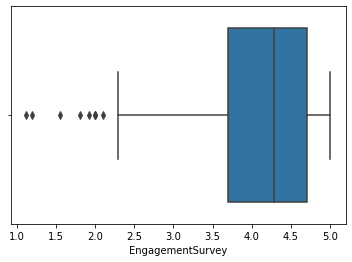

EmpSatisfaction


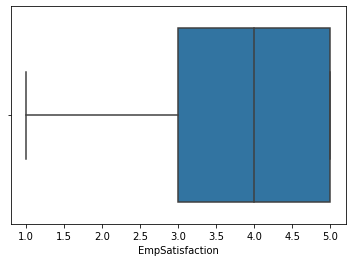

SpecialProjectsCount


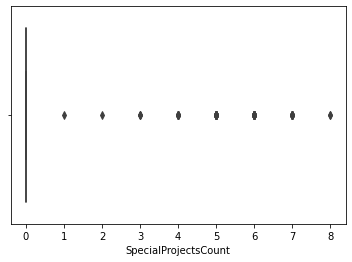

DaysLateLast30


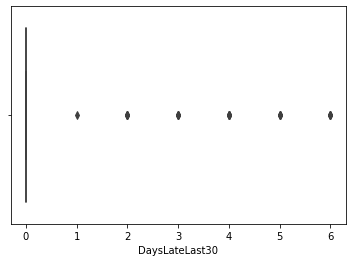

Absences


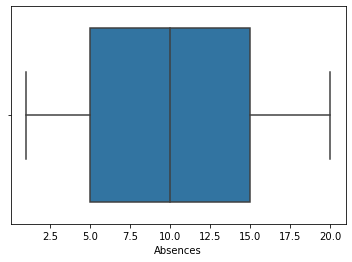

In [47]:
#In salary ,there is tail towards right end.Data is right skewed
#EmpSatisfaction is multimodal distribution.There are two or three top points.
for ncol in numcol:
    print(ncol)
    sns.boxplot(df[ncol])
    plt.xlabel(ncol)
    plt.plot()
    plt.show()

Employee_Name


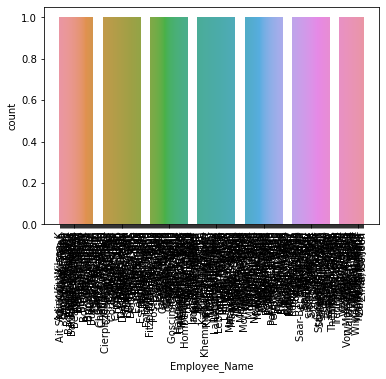

Position


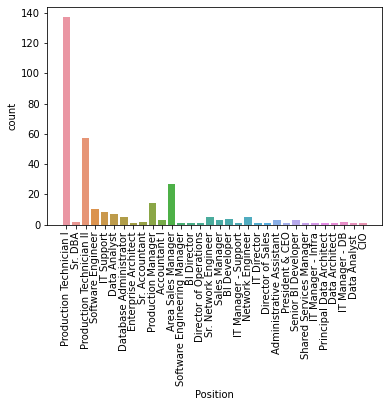

State


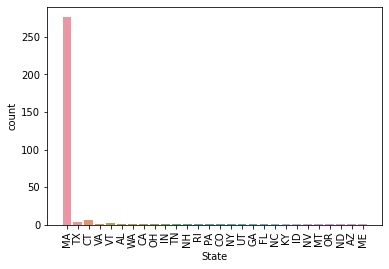

DOB


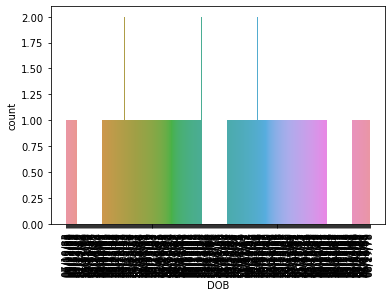

Sex


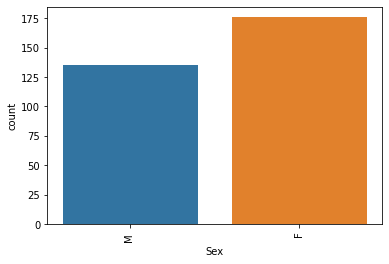

MaritalDesc


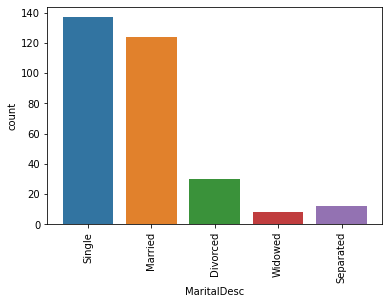

CitizenDesc


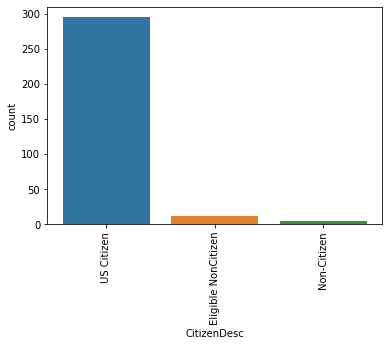

HispanicLatino


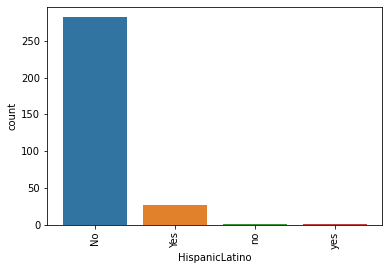

RaceDesc


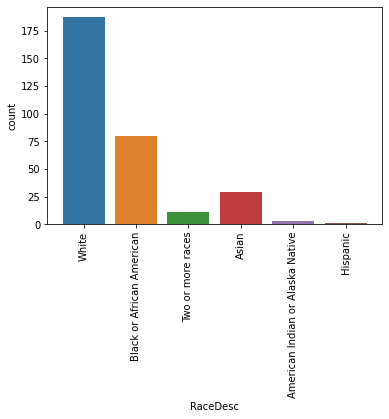

DateofHire


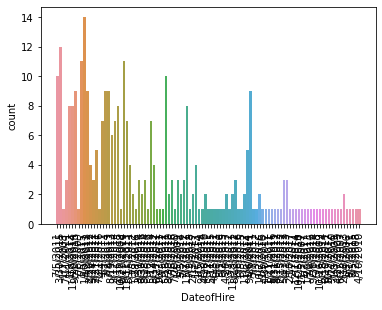

DateofTermination


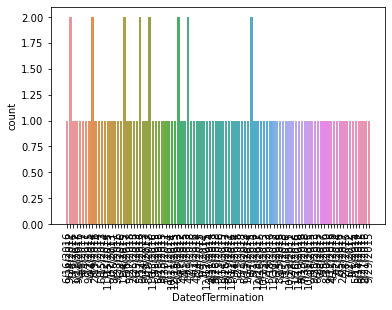

TermReason


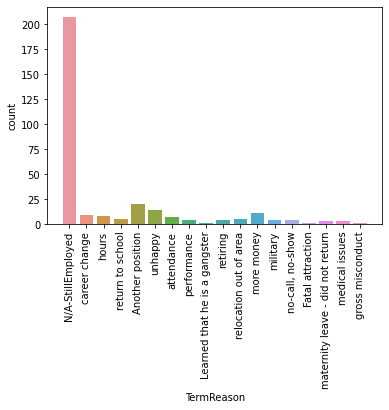

EmploymentStatus


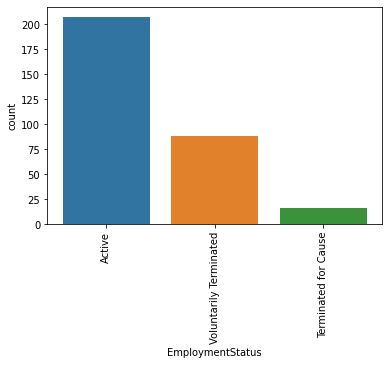

Department


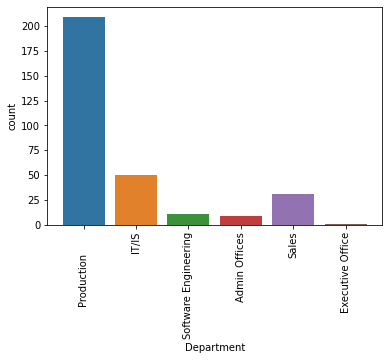

ManagerName


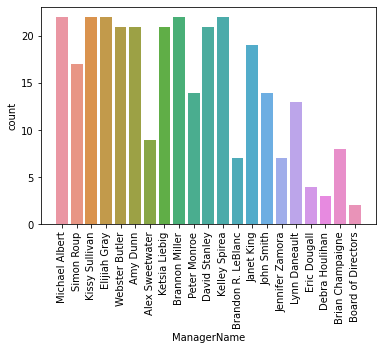

RecruitmentSource


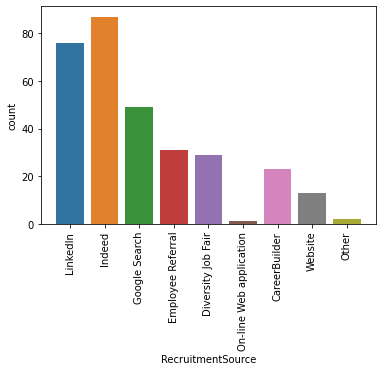

PerformanceScore


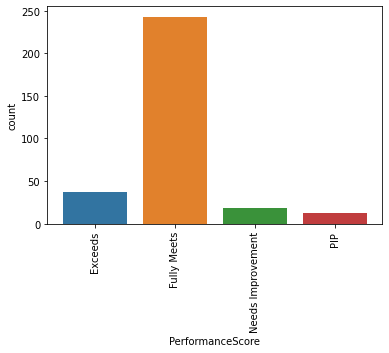

LastPerformanceReview_Date


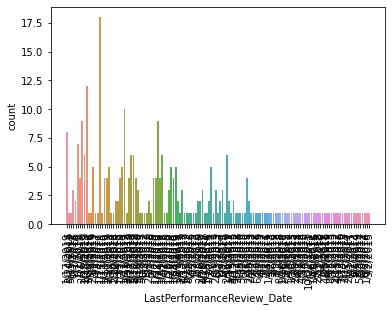

In [48]:
for ncol in catcol:
    print(ncol)
    sns.countplot(df[ncol])
    plt.xlabel(ncol)
    plt.xticks(rotation=90)
    plt.plot()
    plt.show()

In [49]:
#Production Technicial1 is the position which is mostly held.
#Ma state=higher occurance
#Females are more occupied
#Univariate analysis
for i in catcol:
    print (i)
    print (df[i].nunique())
    print(df[i].value_counts())
    print('\n')

Employee_Name
311
Cross, Noah             1
MacLennan, Samuel       1
Kinsella, Kathleen      1
Mckenna, Sandy          1
Akinkuolie, Sarah       1
                       ..
Brill, Donna            1
Hankard, Earnest        1
Rhoads, Thomas          1
Heitzman, Anthony       1
Clukey, Elijian         1
Name: Employee_Name, Length: 311, dtype: int64


Position
32
Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Sales Manager                     3
Senior BI Developer               3
Administrative Assistant          3
Accountant I                      3
Sr. Accountant                    2
IT Manager - DB                   2
Sr. DBA                

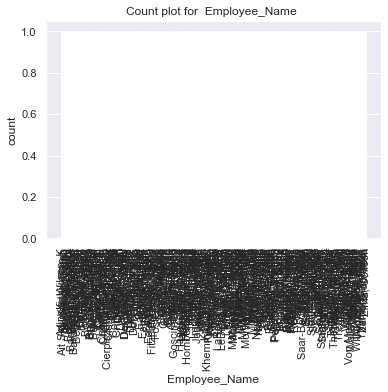

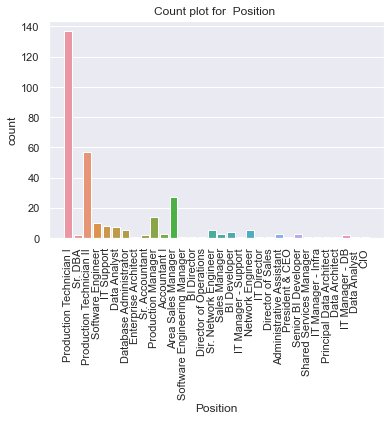

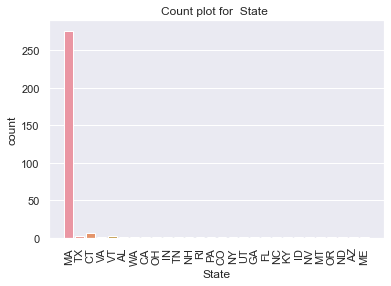

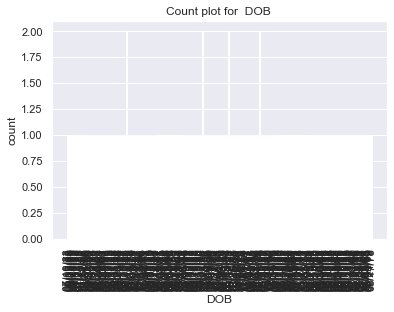

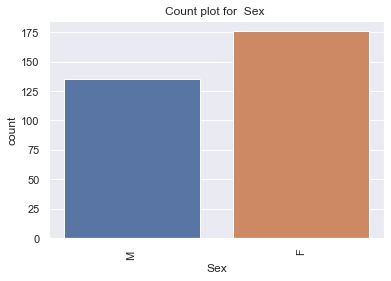

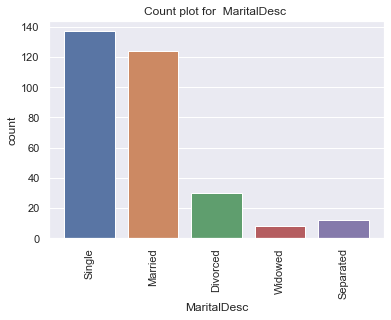

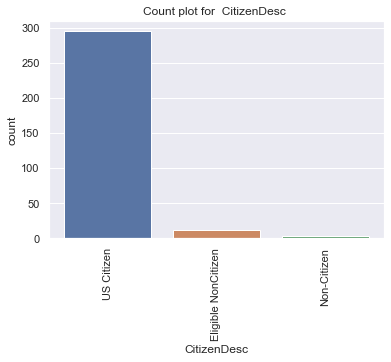

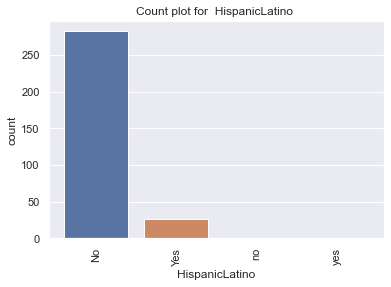

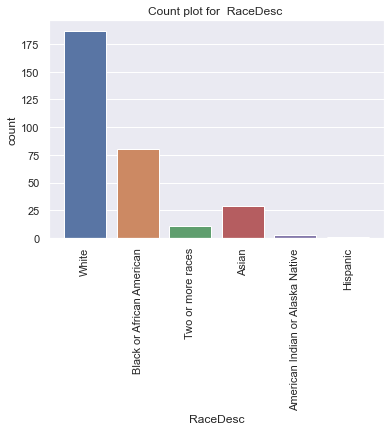

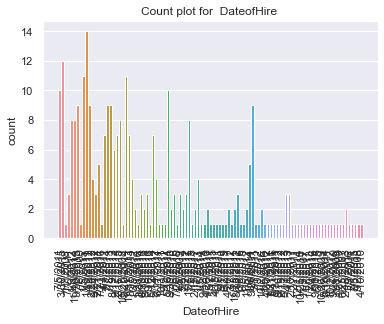

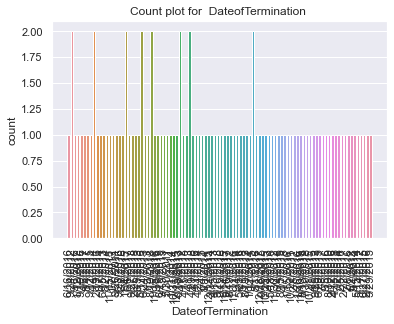

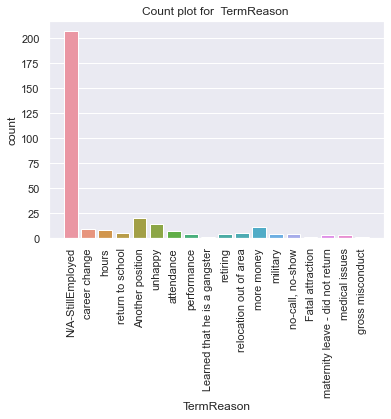

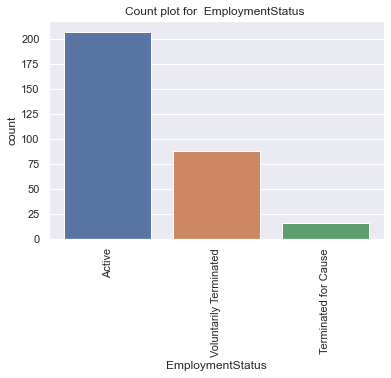

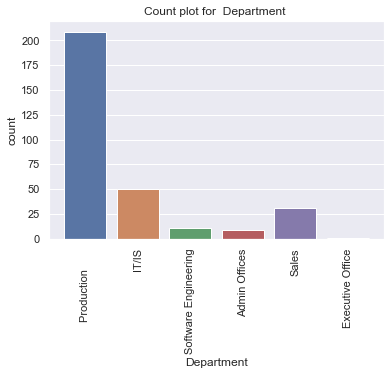

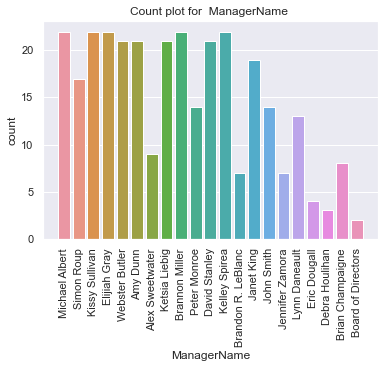

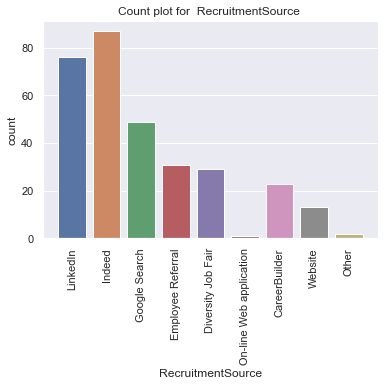

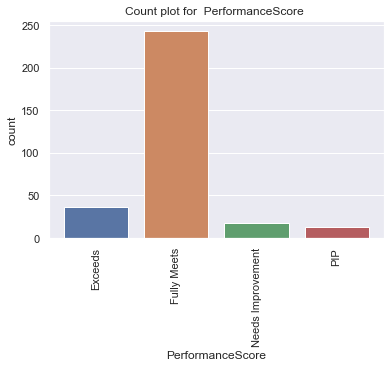

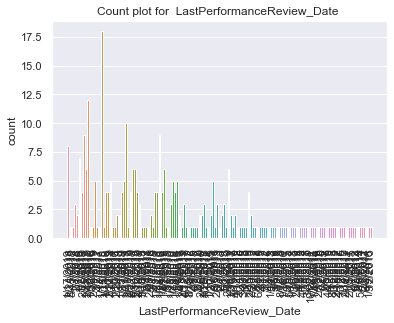

In [50]:
for i in catcol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for  {i} ")
    plt.plot()
    plt.show()

<Figure size 432x288 with 0 Axes>

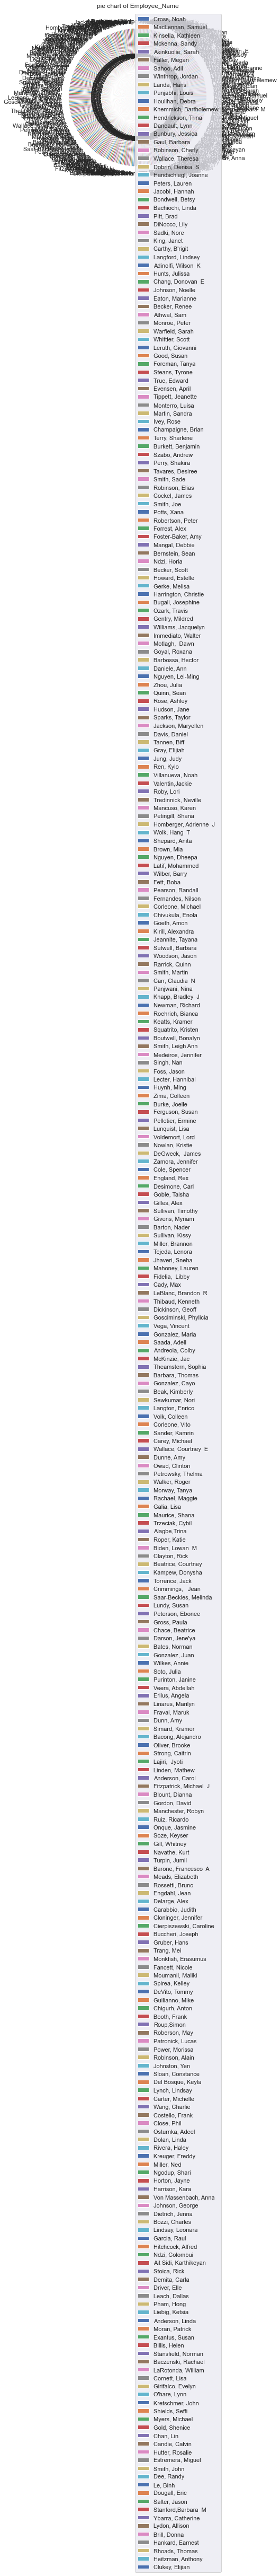

<Figure size 432x288 with 0 Axes>

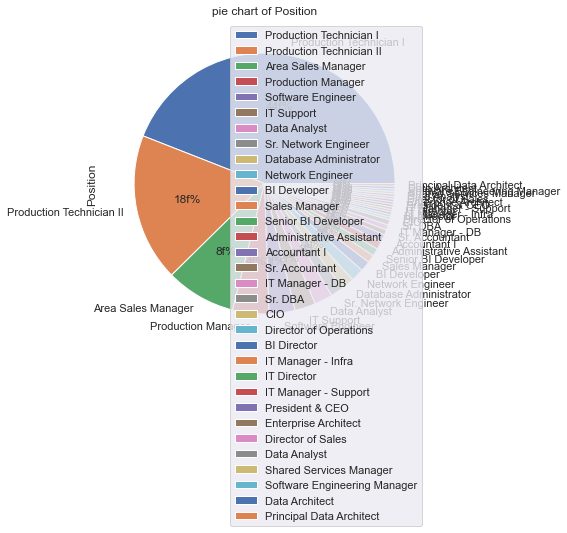

<Figure size 432x288 with 0 Axes>

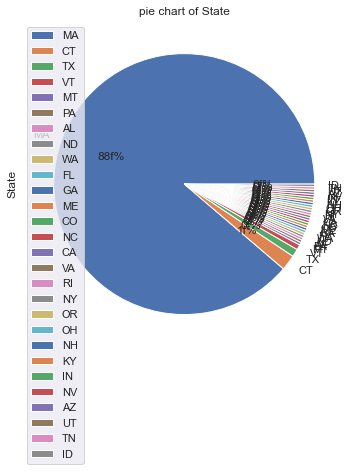

<Figure size 432x288 with 0 Axes>

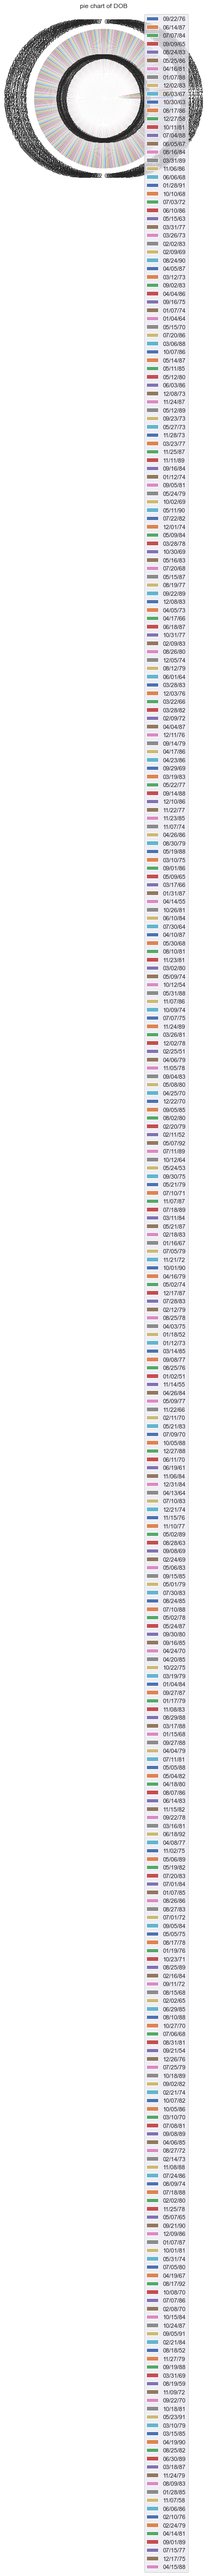

<Figure size 432x288 with 0 Axes>

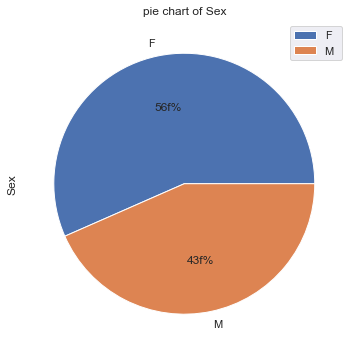

<Figure size 432x288 with 0 Axes>

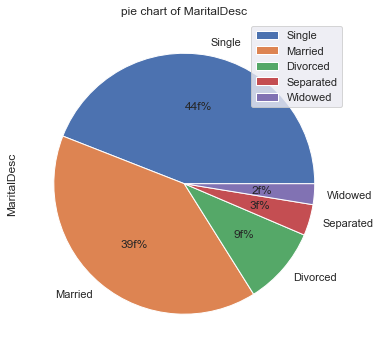

<Figure size 432x288 with 0 Axes>

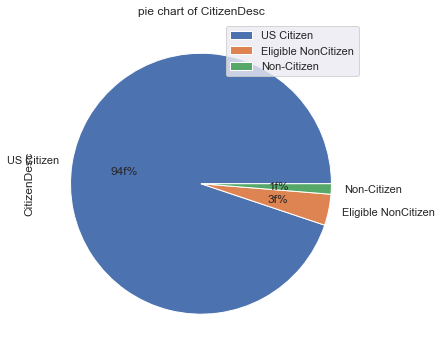

<Figure size 432x288 with 0 Axes>

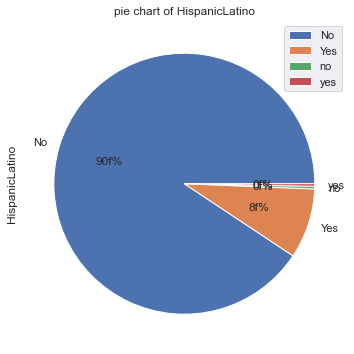

<Figure size 432x288 with 0 Axes>

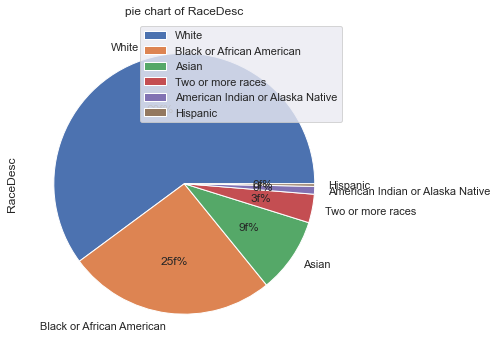

<Figure size 432x288 with 0 Axes>

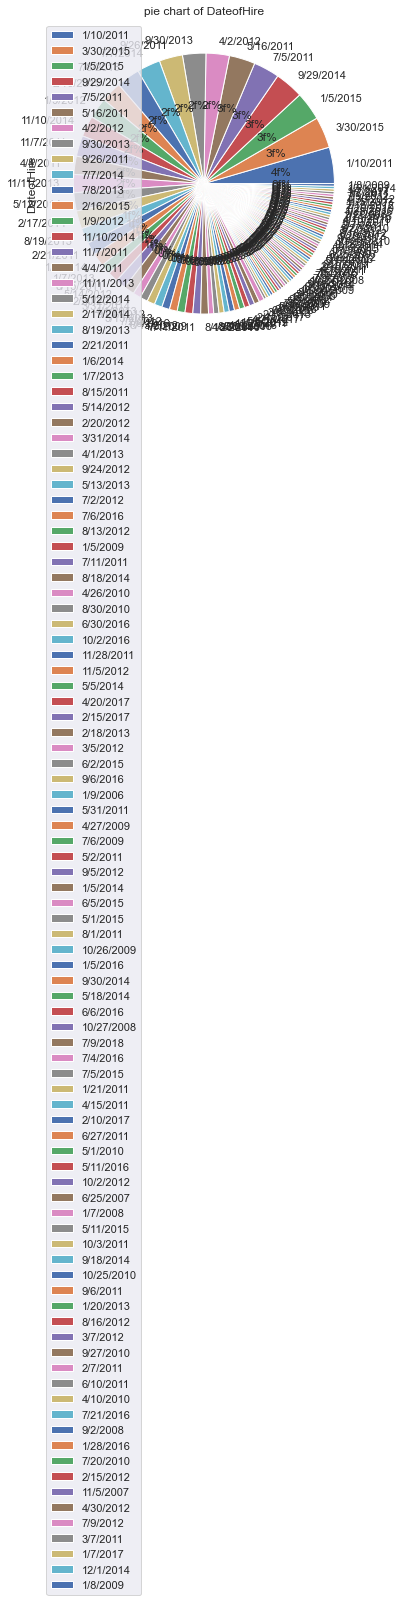

<Figure size 432x288 with 0 Axes>

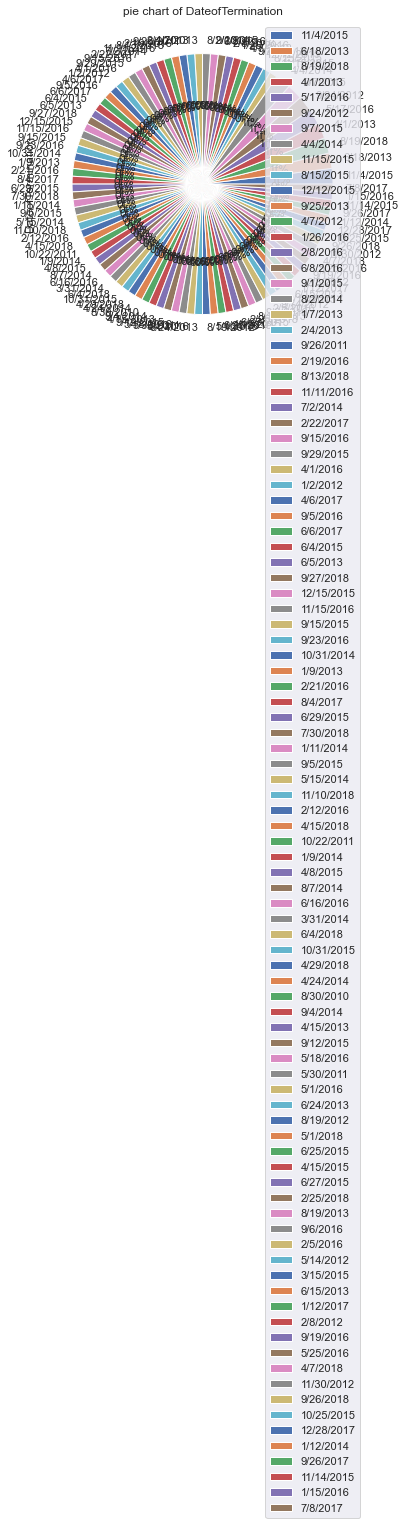

<Figure size 432x288 with 0 Axes>

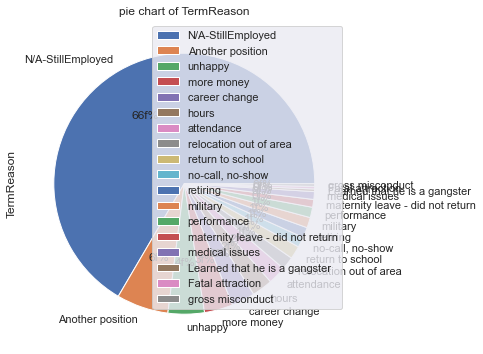

<Figure size 432x288 with 0 Axes>

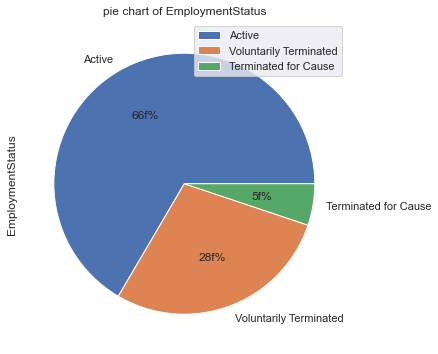

<Figure size 432x288 with 0 Axes>

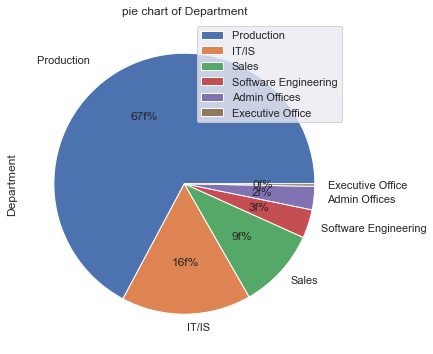

<Figure size 432x288 with 0 Axes>

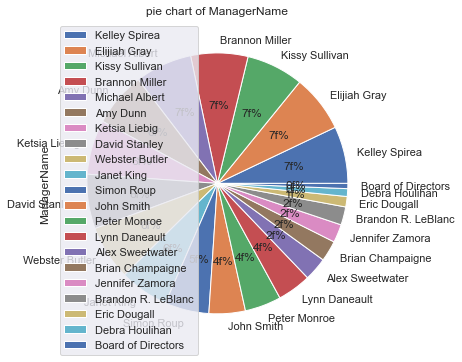

<Figure size 432x288 with 0 Axes>

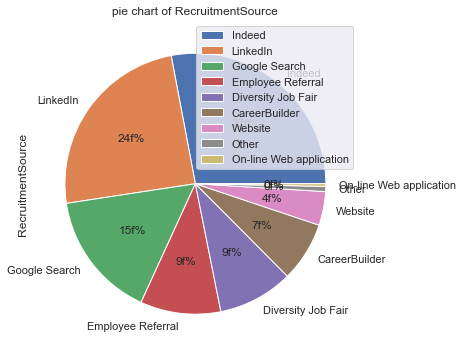

<Figure size 432x288 with 0 Axes>

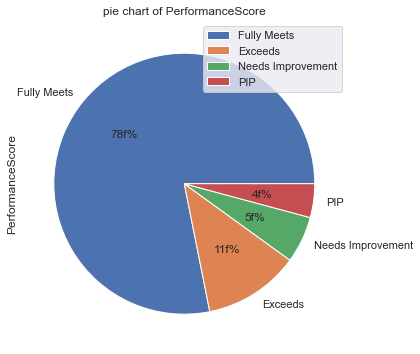

<Figure size 432x288 with 0 Axes>

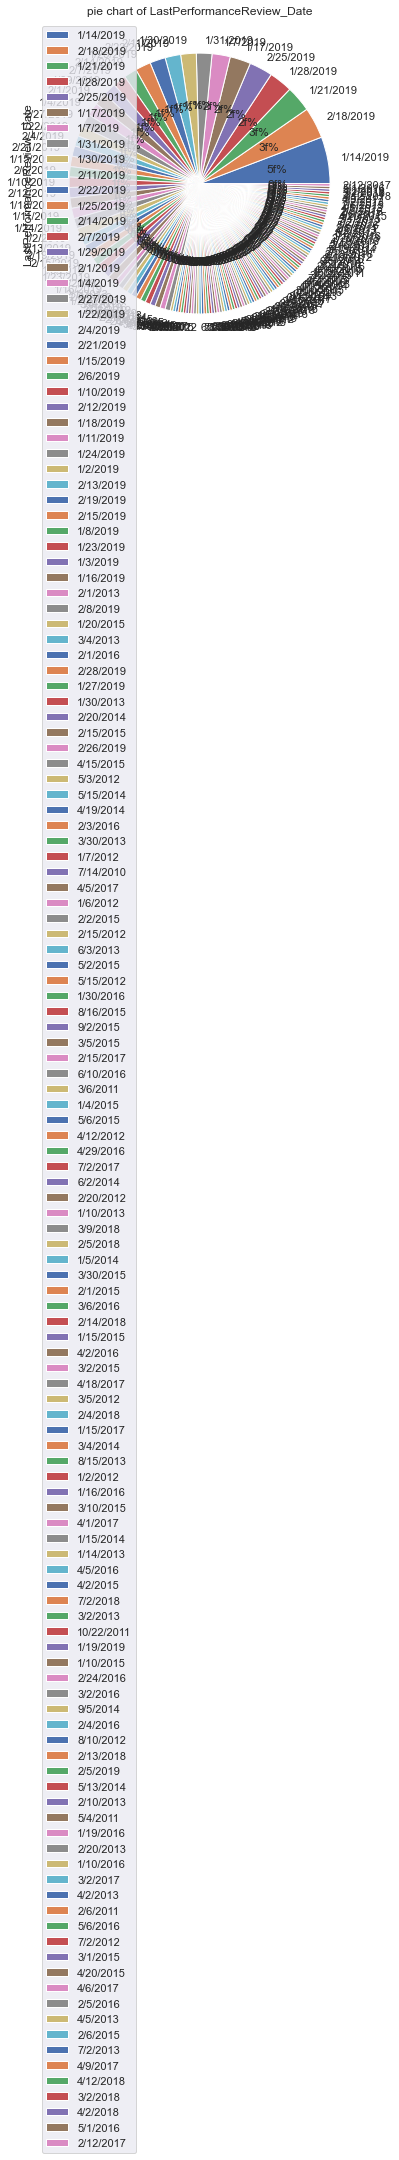

In [53]:
for i in catcol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    count=pd.DataFrame(df[i].value_counts())
    plot=count.plot.pie(subplots=True,autopct="%if%%",figsize=(11,6))
    plt.title(f"pie chart of {i}")
    plt.plot()
    plt.show()

EmpID


<Figure size 432x288 with 0 Axes>

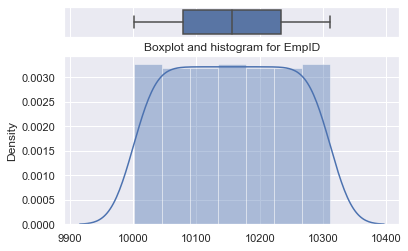

MarriedID


<Figure size 432x288 with 0 Axes>

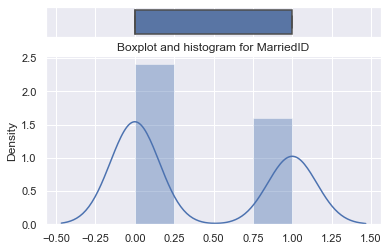

MaritalStatusID


<Figure size 432x288 with 0 Axes>

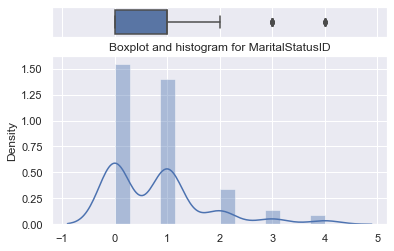

GenderID


<Figure size 432x288 with 0 Axes>

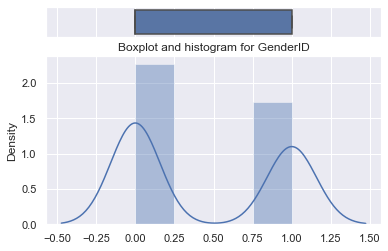

EmpStatusID


<Figure size 432x288 with 0 Axes>

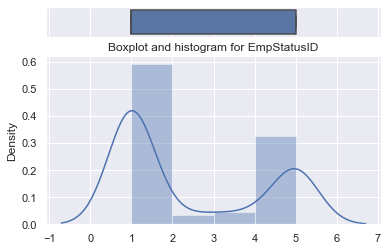

DeptID


<Figure size 432x288 with 0 Axes>

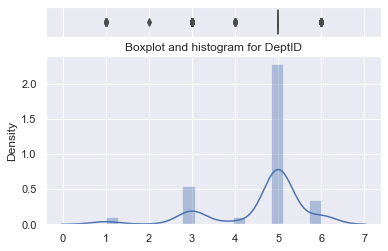

PerfScoreID


<Figure size 432x288 with 0 Axes>

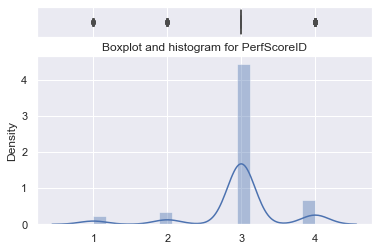

FromDiversityJobFairID


<Figure size 432x288 with 0 Axes>

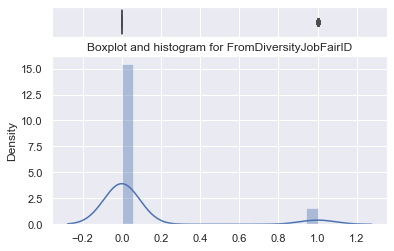

Salary


<Figure size 432x288 with 0 Axes>

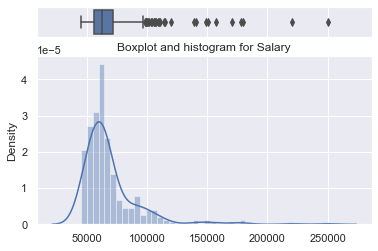

Termd


<Figure size 432x288 with 0 Axes>

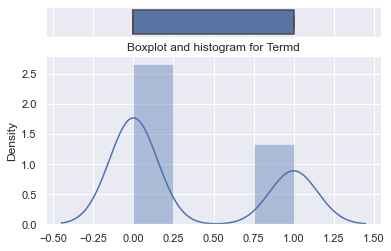

PositionID


<Figure size 432x288 with 0 Axes>

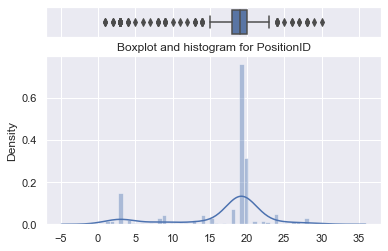

Zip


<Figure size 432x288 with 0 Axes>

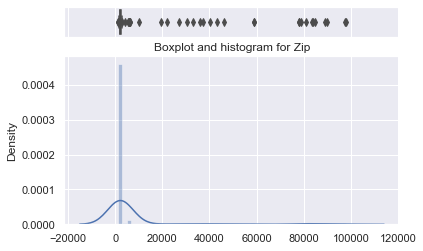

ManagerID


<Figure size 432x288 with 0 Axes>

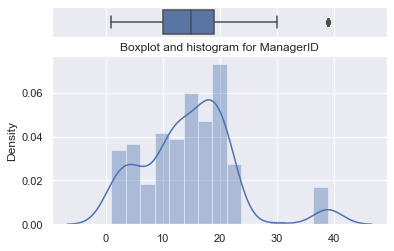

EngagementSurvey


<Figure size 432x288 with 0 Axes>

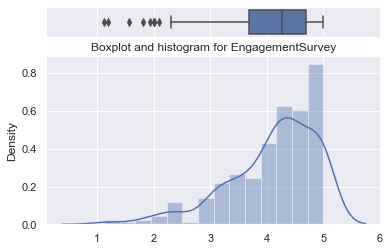

EmpSatisfaction


<Figure size 432x288 with 0 Axes>

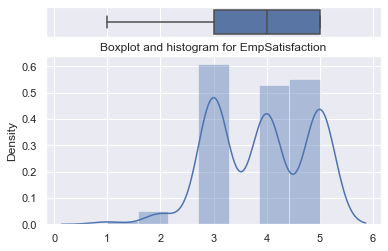

SpecialProjectsCount


<Figure size 432x288 with 0 Axes>

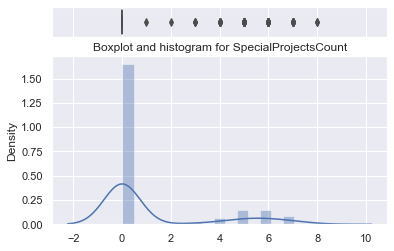

DaysLateLast30


<Figure size 432x288 with 0 Axes>

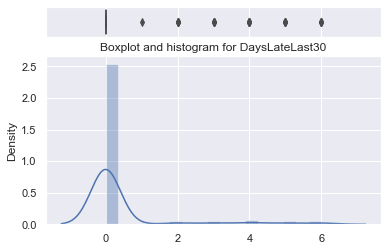

Absences


<Figure size 432x288 with 0 Axes>

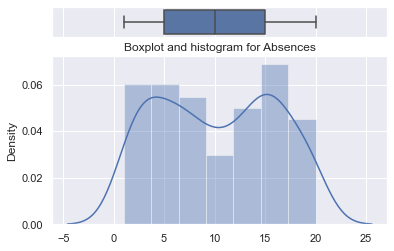

In [52]:
for i in numcol:
    print(i)
    plt.figure()
    sns.set_theme(style="darkgrid")
    f, (ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(x=df[i],ax=ax_box)
    sns.distplot(x=df[i],ax=ax_hist)
    ax_box.set(xlabel='')
    plt.plot()
    plt.title(f"Boxplot and histogram for {i}")
    plt.show()

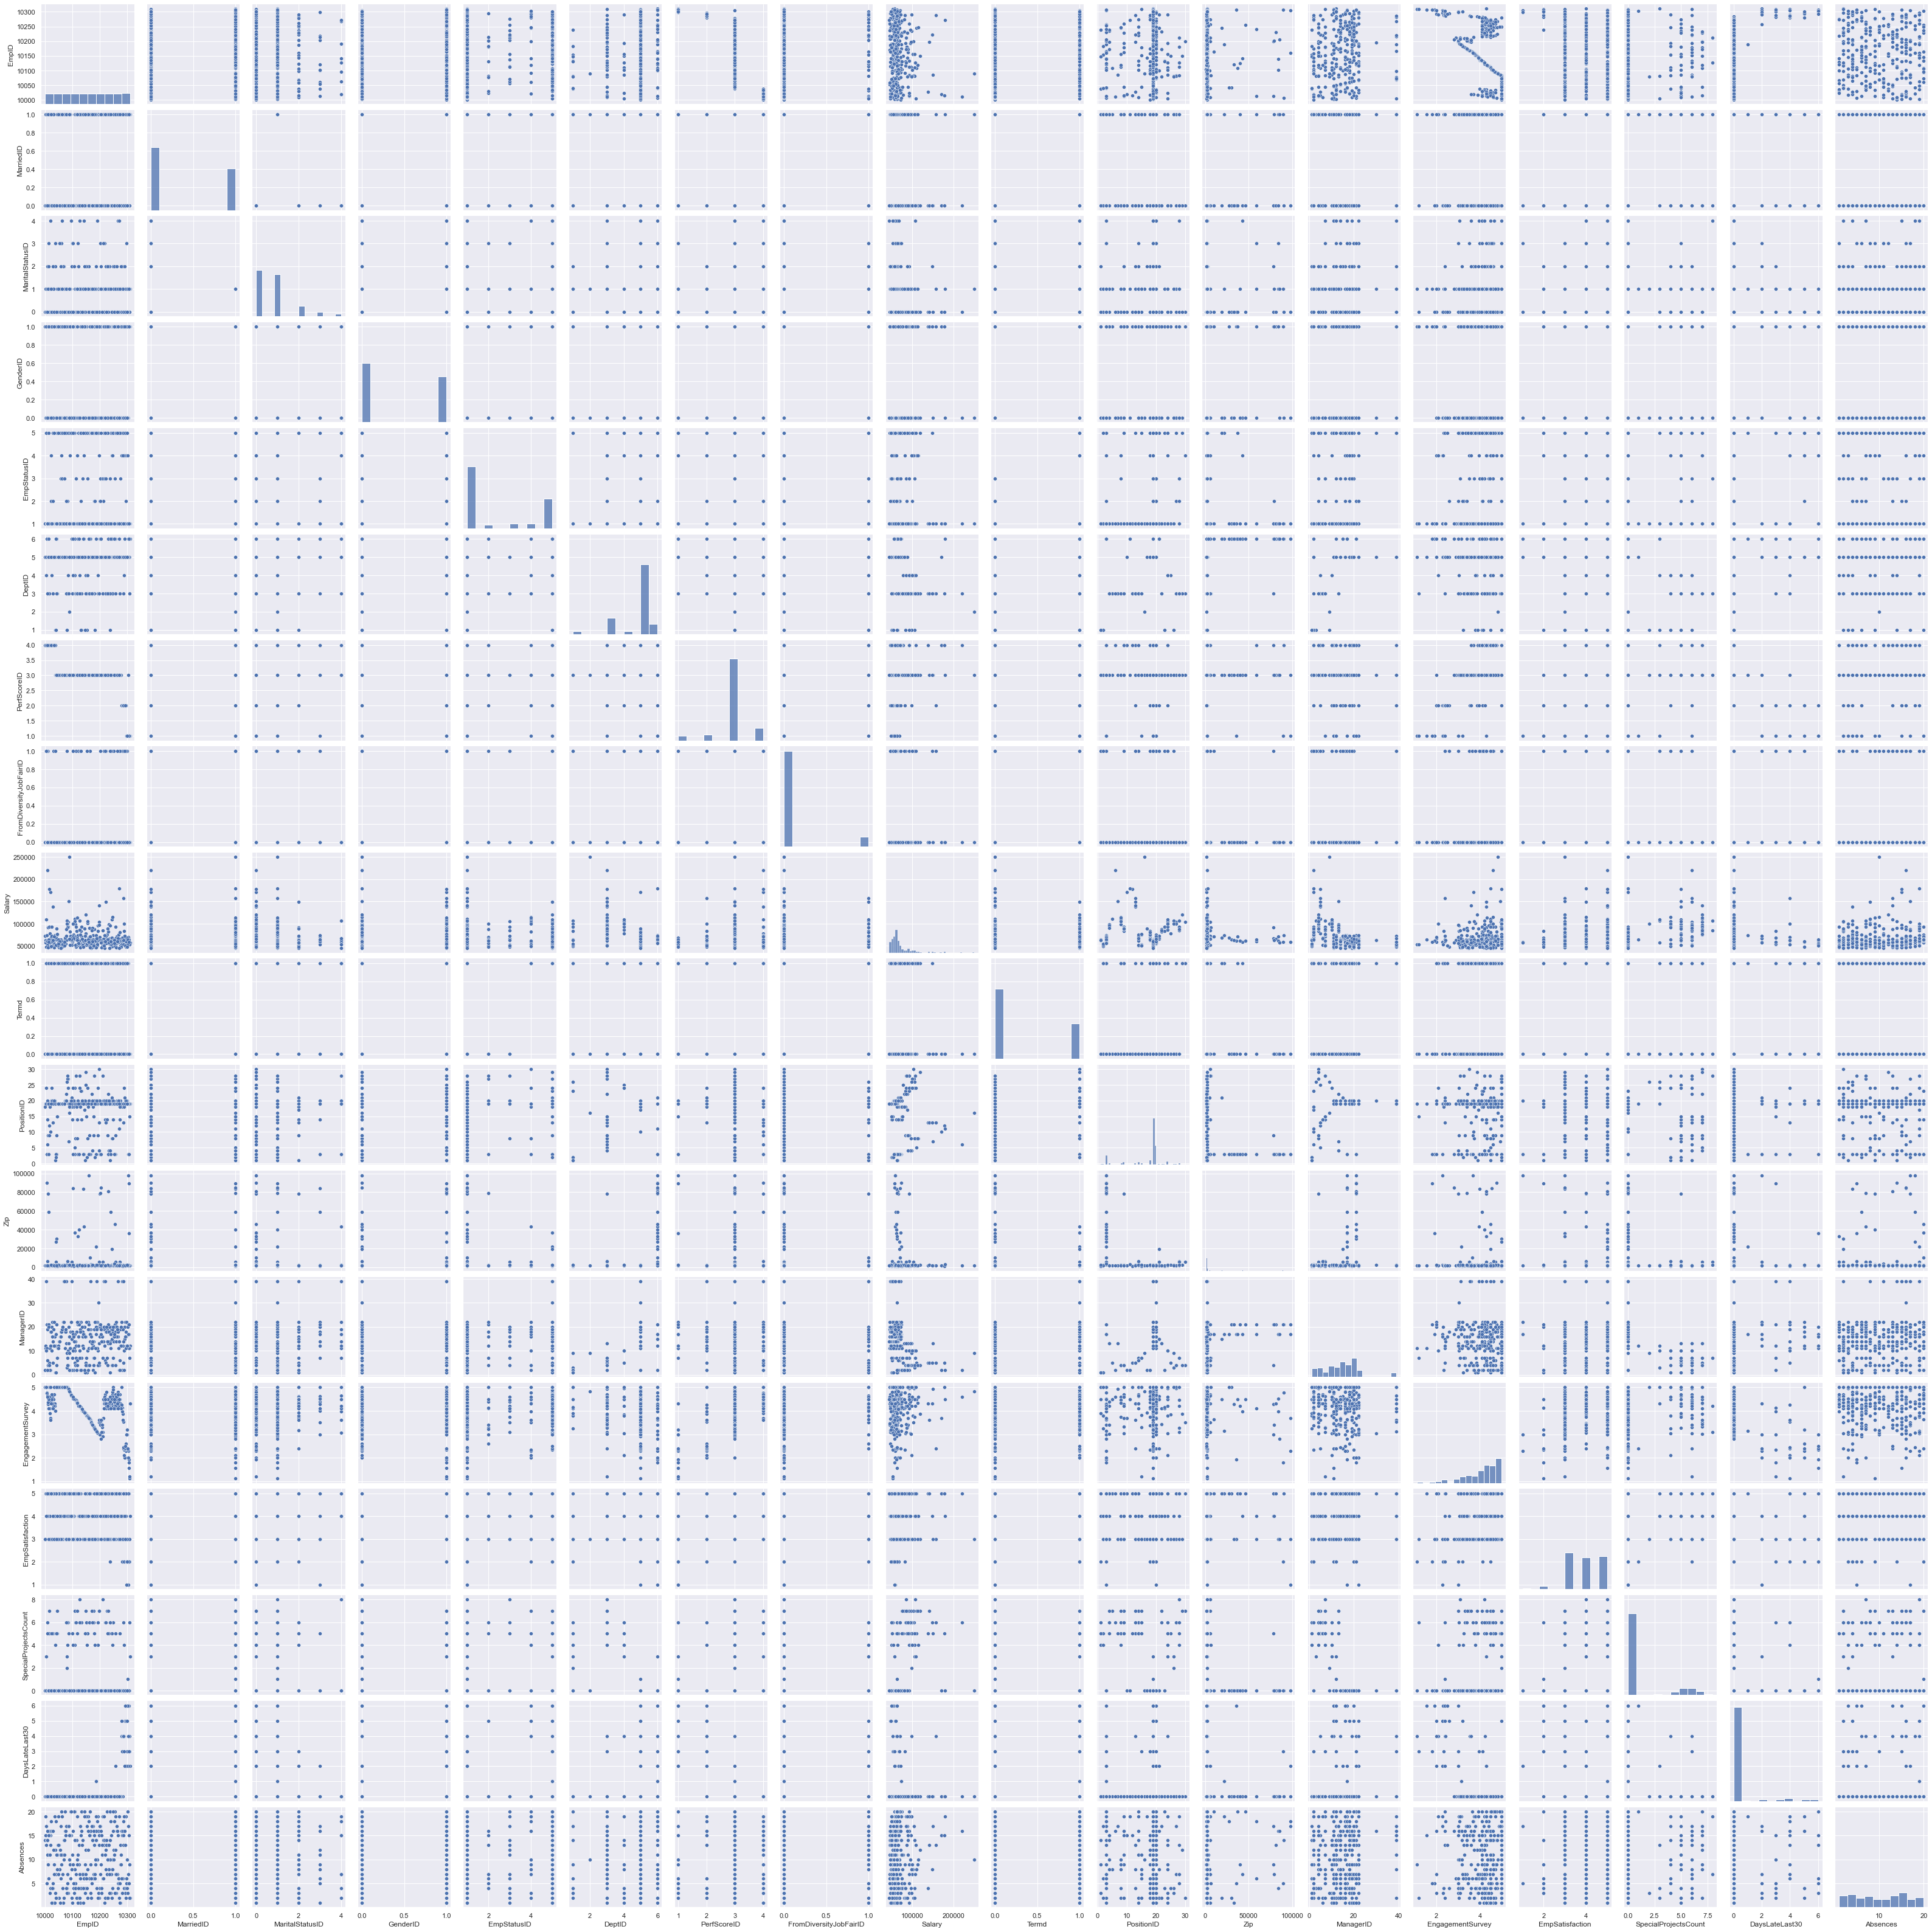

In [59]:
#Multivariate Analysis
sns.pairplot(df)
plt.plot()
plt.show()

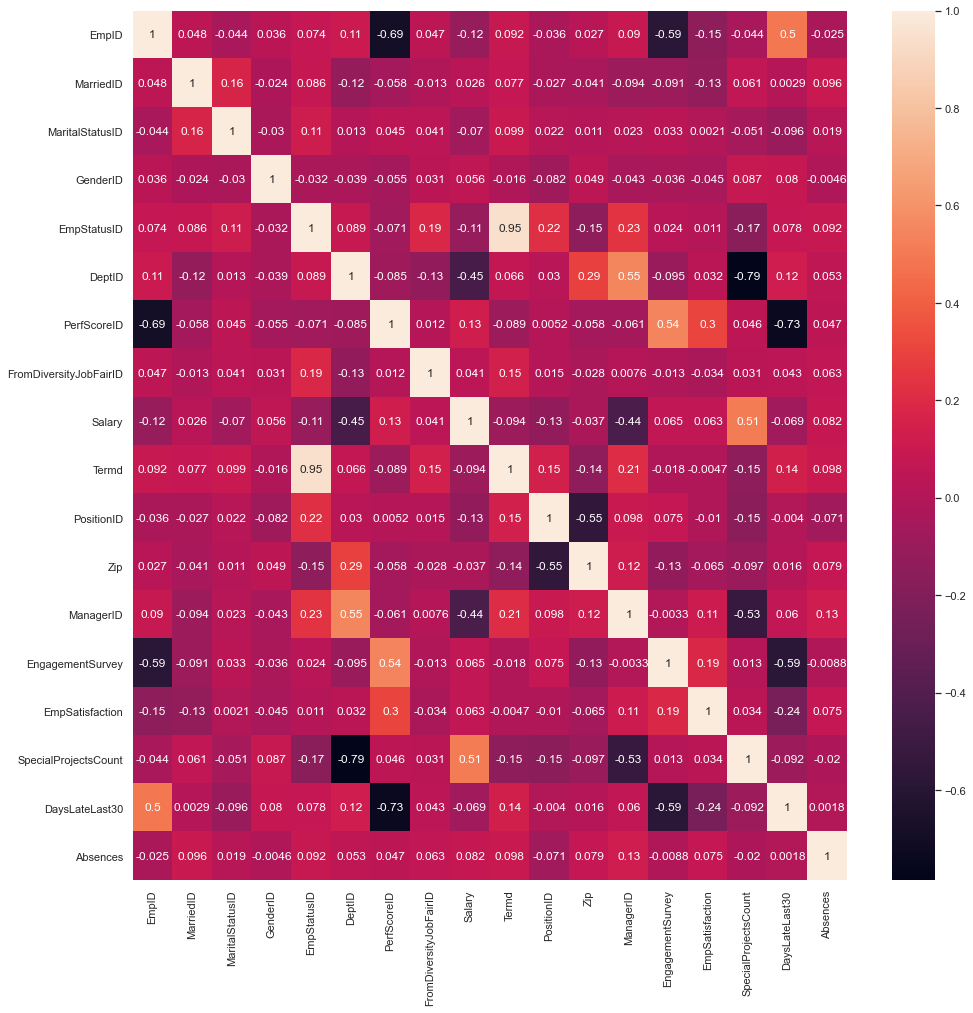

In [60]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [61]:
# Now convert these to datetime

df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])
df['DOB'] = pd.to_datetime(df['DOB'])

# Verify and confirm
df[['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date']].head(5)

DOB DateofHire DateofTermination LastPerformanceReview_Date
0 1983-07-10 2011-07-05               NaT                 2019-01-17
1 1975-05-05 2015-03-30        2016-06-16                 2016-02-24
2 1988-09-19 2011-07-05        2012-09-24                 2012-05-15
3 1988-09-27 2008-01-07               NaT                 2019-01-03
4 1989-09-08 2011-07-11        2016-09-06                 2016-02-01

In [65]:
# Show histogram based on Years of Experience
# We have no Years of Experience column in the dataset, so add a column based on the DateofHire and DateofTermination (if available) 
# using below function. This may not show the full experience of the employee before the current employment, but useful 
from datetime import date
import  numpy as np
def experienceCalc(doj, dot):
    today = date.today()
    return np.where(pd.isna(dot), today.year - doj.dt.year, dot.dt.year - doj.dt.year)
 
df['YearsOfExperience'] = experienceCalc(df['DateofHire'], df['DateofTermination'])
df[['YearsOfExperience']]

YearsOfExperience
0                 11.0
1                  1.0
2                  1.0
3                 14.0
4                  5.0
..                 ...
306                8.0
307                7.0
308               12.0
309                7.0
310                8.0

[311 rows x 1 columns]

<AxesSubplot:>

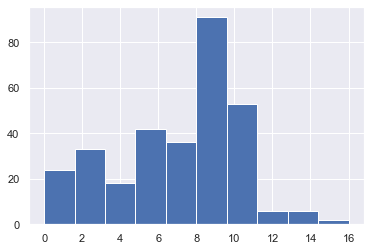

In [66]:
# Now show histogram for YearsOfExperience

df['YearsOfExperience'].hist()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='YearsOfExperience', ylabel='Salary'>

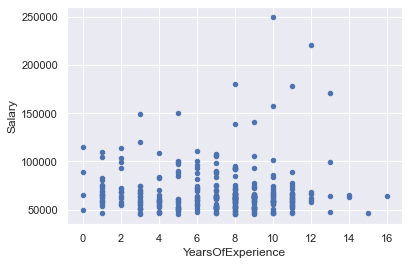

In [67]:
# Find relation days employed and Salary

df.plot(x='YearsOfExperience',y='Salary',kind='scatter')
#Looks like there is no relation between days employed and salary

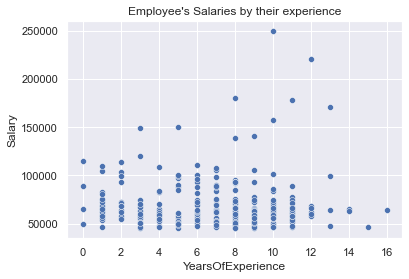

In [68]:
sns.scatterplot(x=df['YearsOfExperience'],y=df['Salary'])

plt.title("Employee's Salaries by their experience")
plt.show()